# Project Description

The objective of this project is to predict whether the patient has diabetes or not based on various features like Glucose, BMI, Insulin, and Age. A Data gathering to Model evaluation will be performed. During Model evaluation, a comparison of various MLA will be performed based on the accuracy score metric and that yields the best one.


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\ssmit\Desktop\diabetes.csv')

# Statistical Description

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
# Dataset dimensions - (rows, columns)
df.shape
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
#Statistical summary
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [32]:
#null values count

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Observation
Dataset Size:

The dataset consists of 768 total records.

Data Types:

There are 9 features in the dataframe, and each feature is of either integer or float dtype.

Zero Values:

Some features such as Bloodpressure, Insulin, Glucose, BMI contain zero values, indicating potential missing data or outliers. It's common to treat zero values in these contexts as missing values.


Missing Data:

There are no NaN (Not a Number) values in the dataframe. However, the presence of zero values in certain features suggests potential missing or undefined data that might need to be addressed.


Outcome Column:

The 'Outcome' column is the target variable, and it has two representations: 1 for positive diabetes and 0 for negative diabetes.


# Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

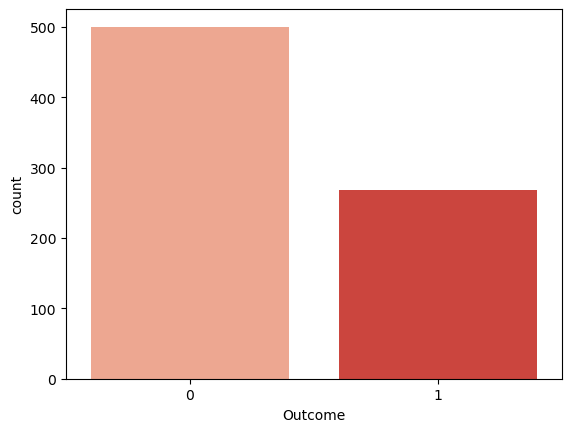

In [39]:
# Outcome countplot
sns.countplot(x = 'Outcome',data=df,palette='Reds')

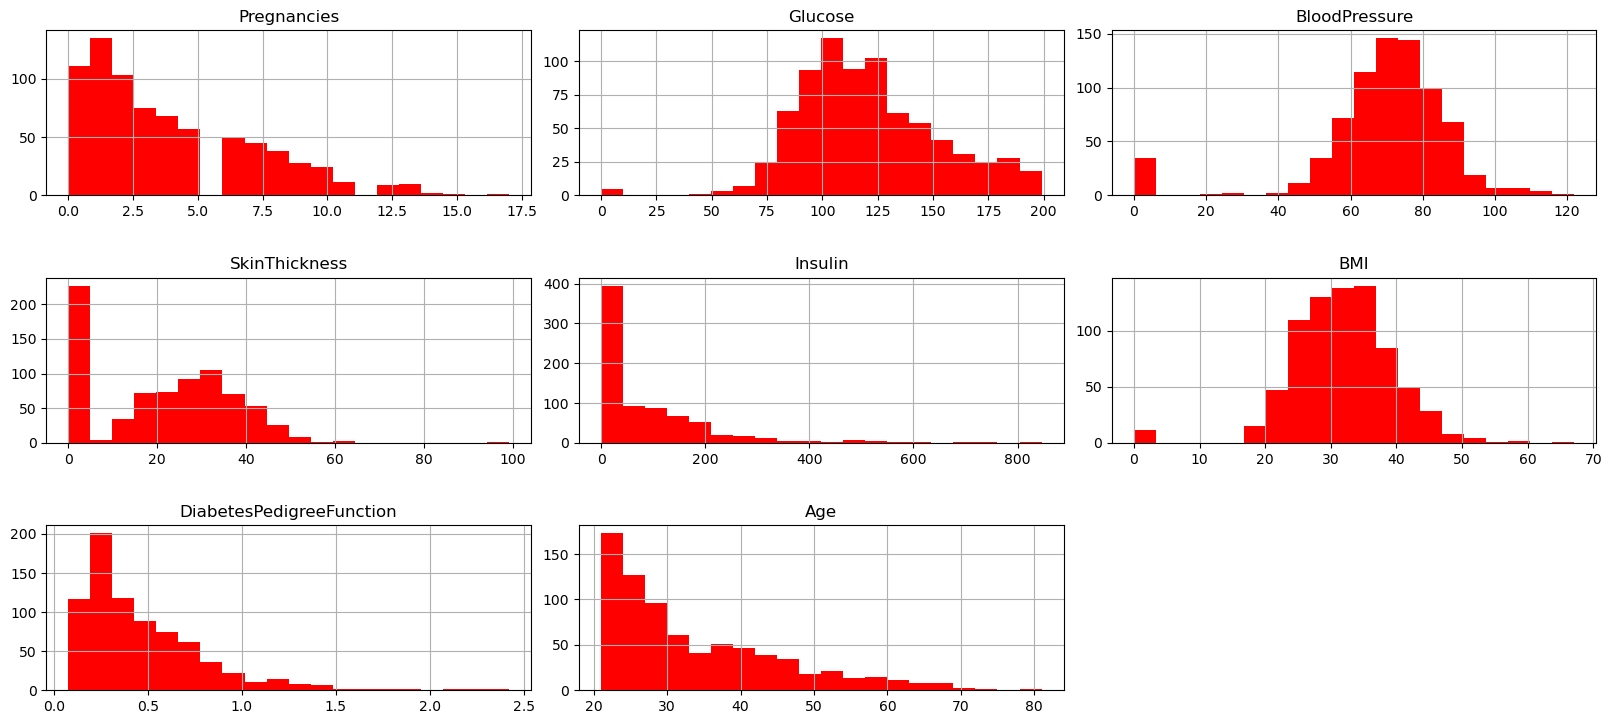

In [43]:
# Histogram of each feature
import itertools

col = df.columns[:8]
plt.subplots(figsize=(20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length//2)+1, 3, j + 1)  # Corrected the subplot parameters
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    df[i].hist(bins=20, color='red')
    plt.title(i)

plt.show()


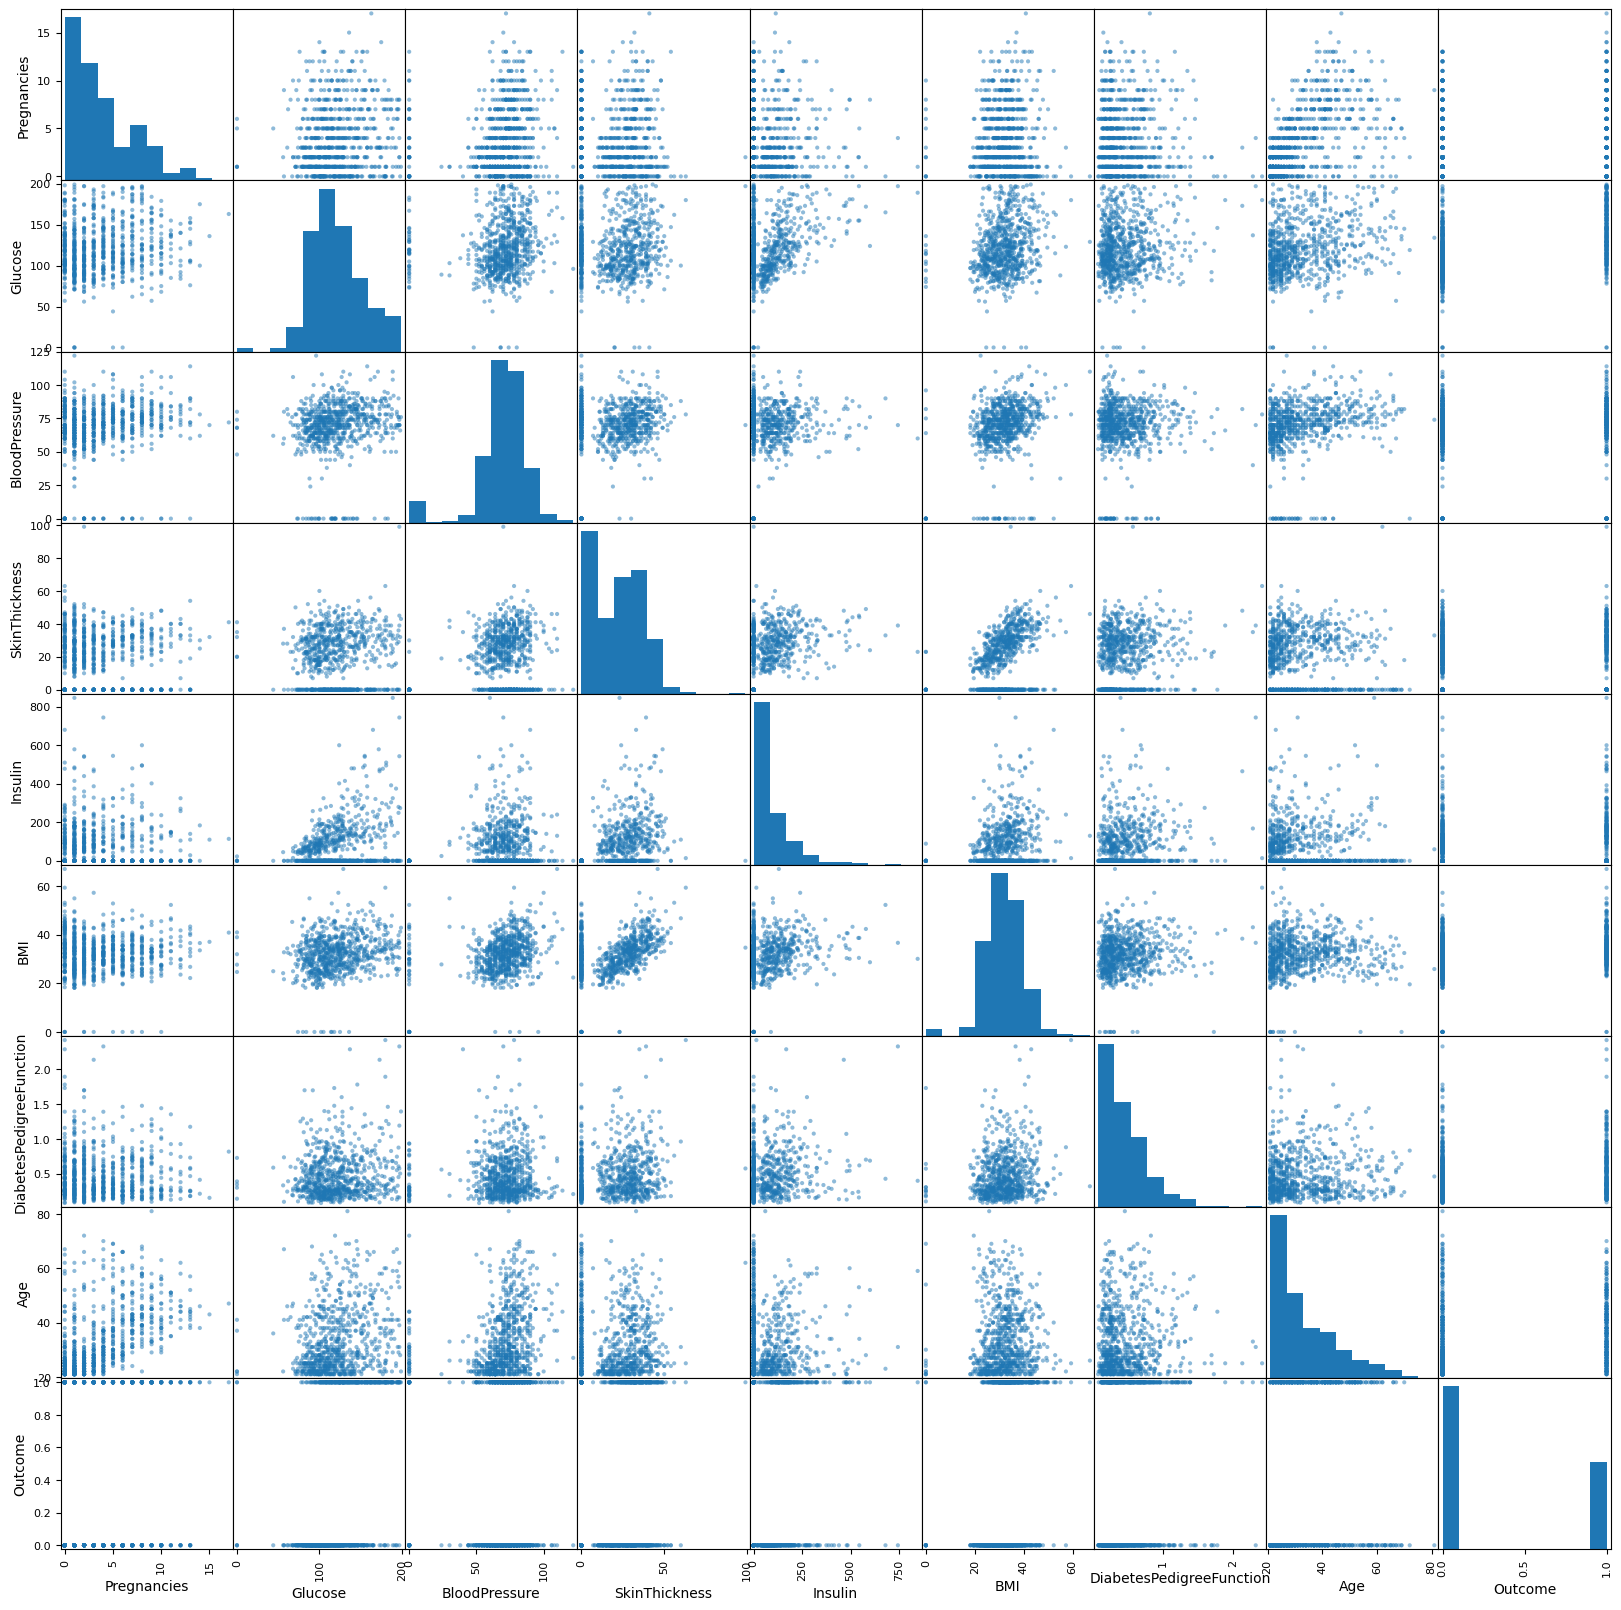

In [52]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, figsize=(20, 20))
plt.show()

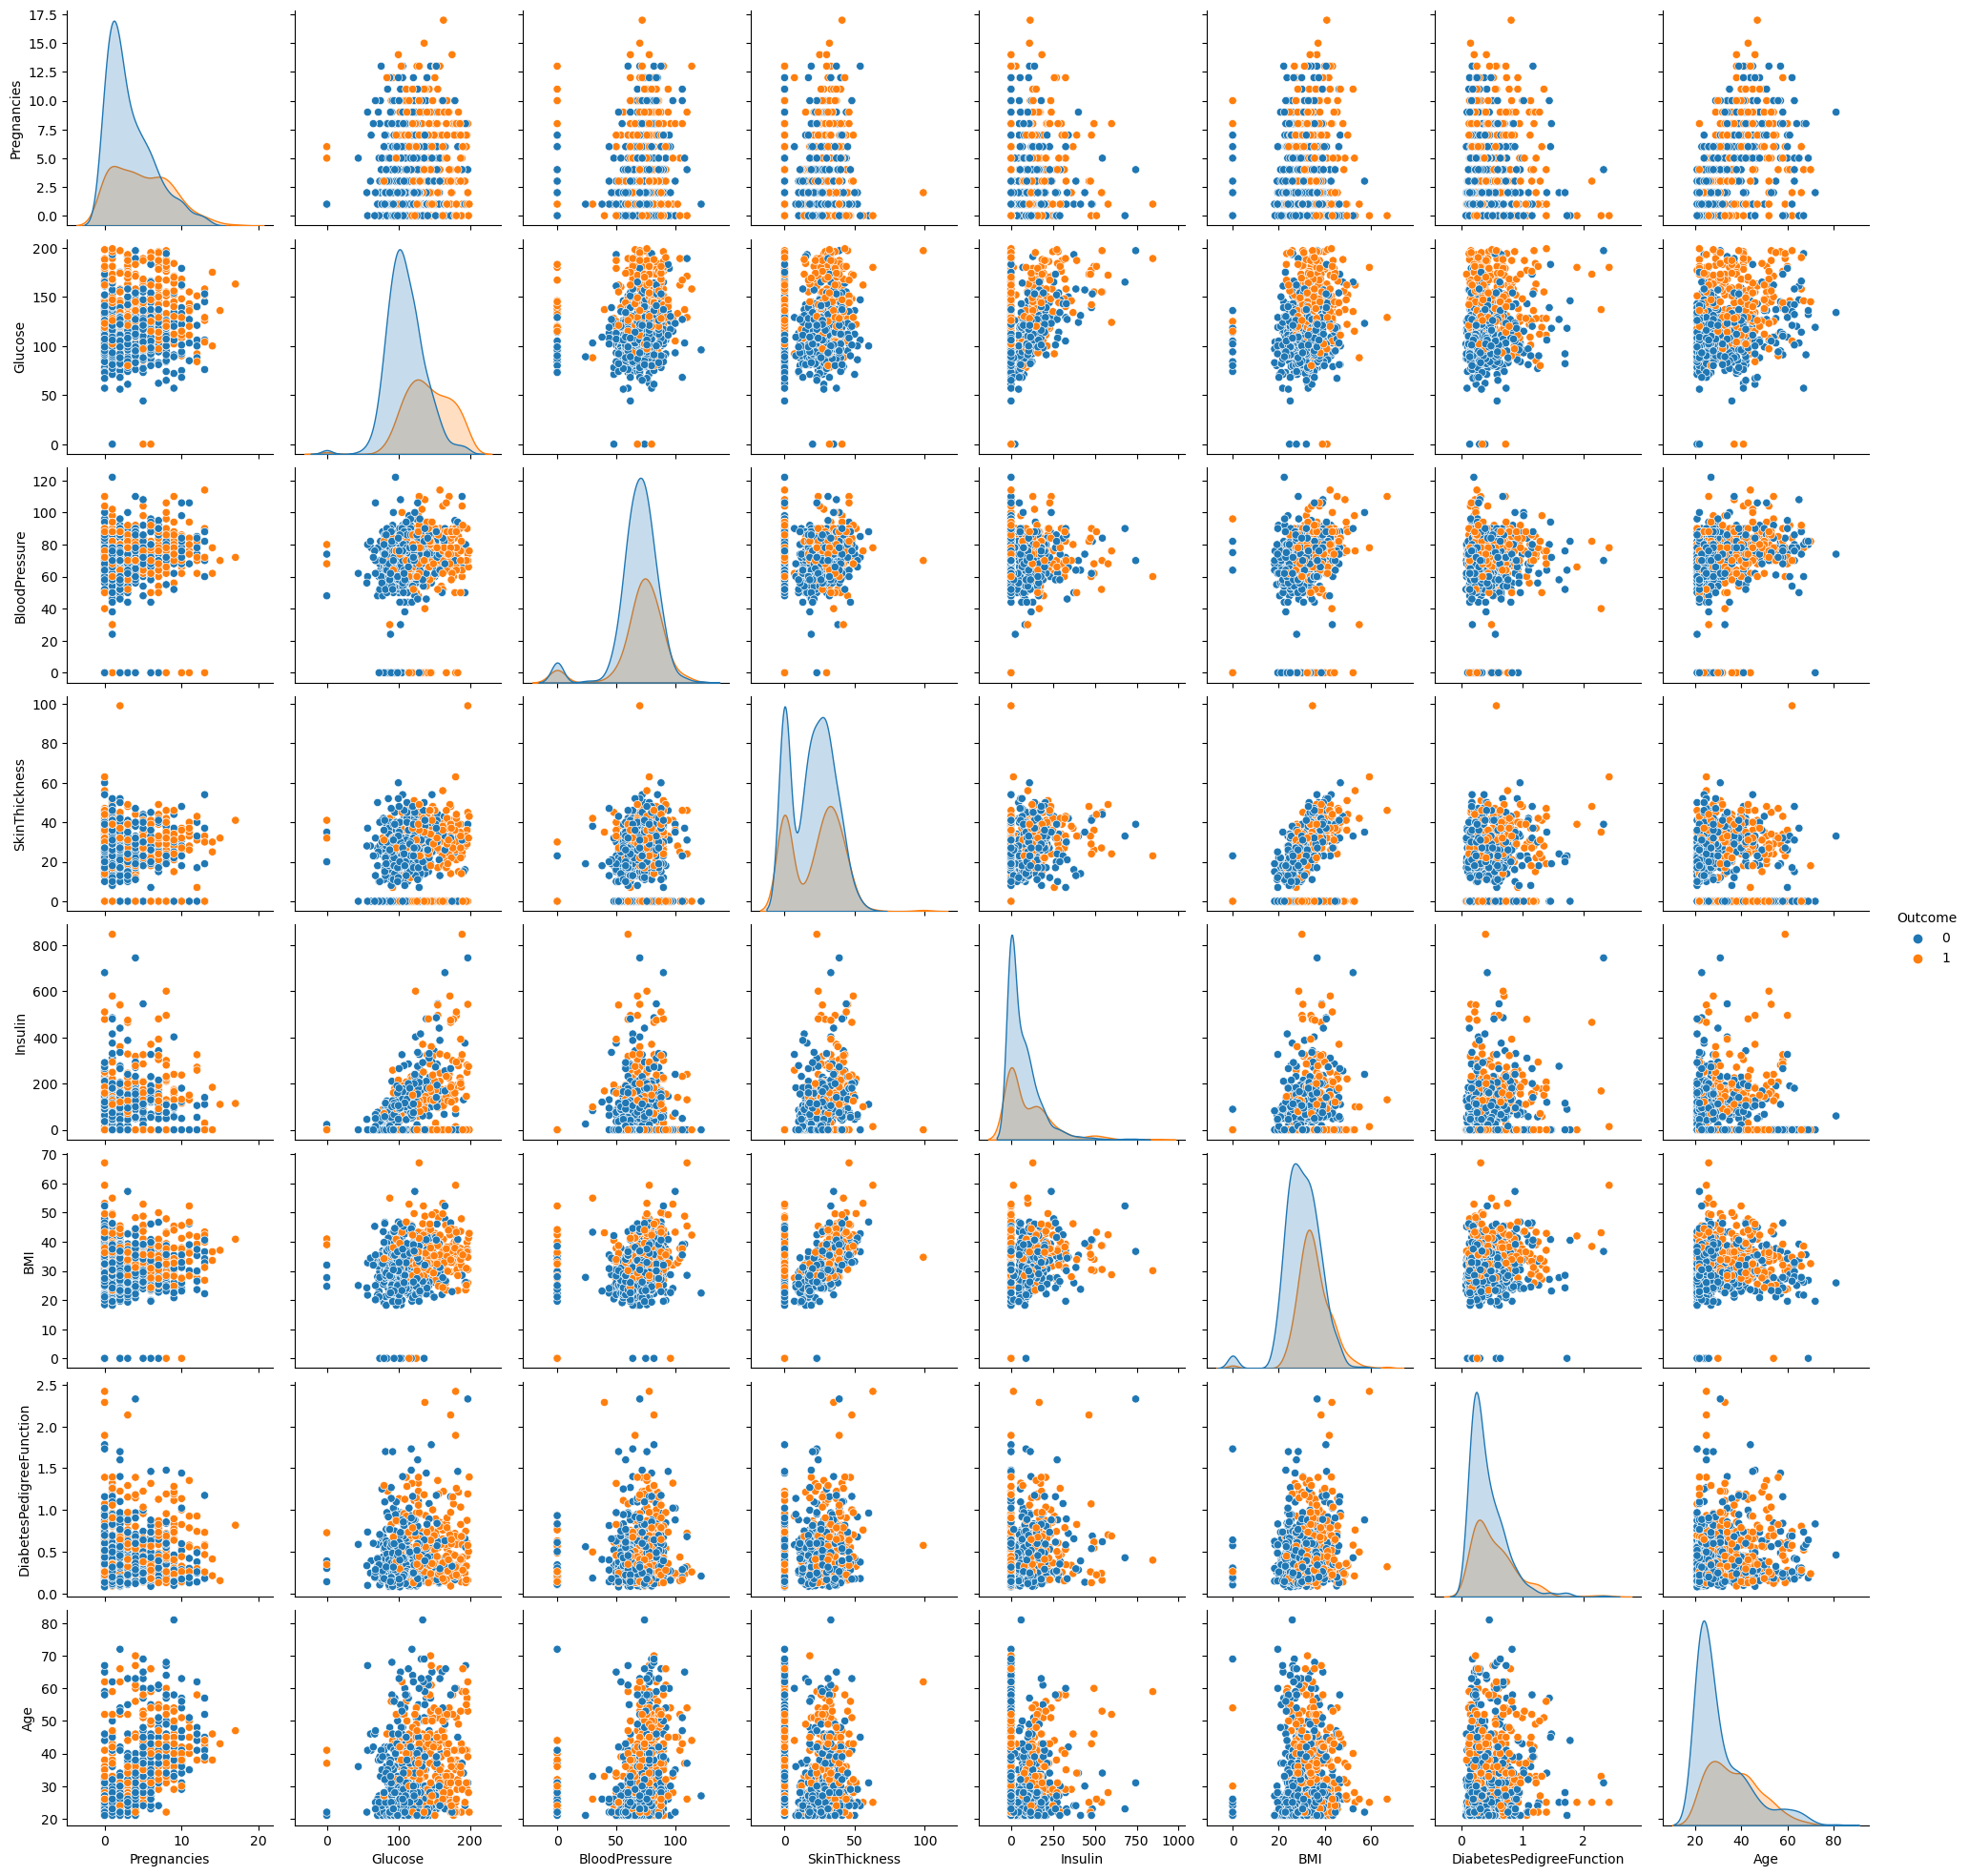

In [58]:
# Pairplot 
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

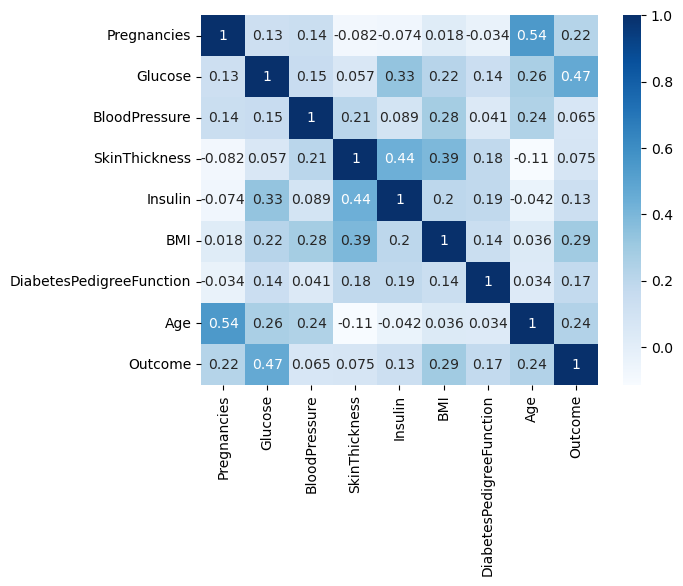

In [60]:
# Heatmap
sns.heatmap(df.corr(), annot = True, cmap='Blues')
plt.show()

# Observations
1. When analyzing the count plot it was observed that the dataset appears to be imbalanced, the number of patients that do not have diabetes is greater than the number of individuals with diabetes.


2. When analyzing the heat correlation map, a high correlation is observed between the Outcome and BMI, Glucose, Age, and Insulin. In addition, to further predict the outcome these features will be selected to accept input from the users.

# Data Preprocessing

In [62]:
dataframe_new = df

In [73]:
# Replacing zero values with NaN
dataframe_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataframe_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [74]:
# Count of NaN
dataframe_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [75]:
# Replacing NaN with mean values

dataframe_new["Glucose"].fillna(dataframe_new["Glucose"].mean(), inplace = True)
dataframe_new["BloodPressure"].fillna(dataframe_new["BloodPressure"].mean(), inplace = True)
dataframe_new["SkinThickness"].fillna(dataframe_new["SkinThickness"].mean(), inplace = True)
dataframe_new["Insulin"].fillna(dataframe_new["Insulin"].mean(), inplace = True)
dataframe_new["BMI"].fillna(dataframe_new["BMI"].mean(), inplace = True)

In [76]:
# Statistical summary
dataframe_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [79]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataframe_scaled = sc.fit_transform(dataframe_new)

In [80]:
dataframe_scaled = pd.DataFrame(dataframe_scaled)

In [81]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataframe_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataframe_scaled.iloc[:, 8].values

In [83]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataframe_new['Outcome'] )

In [84]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


# Data Modeling

In [85]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

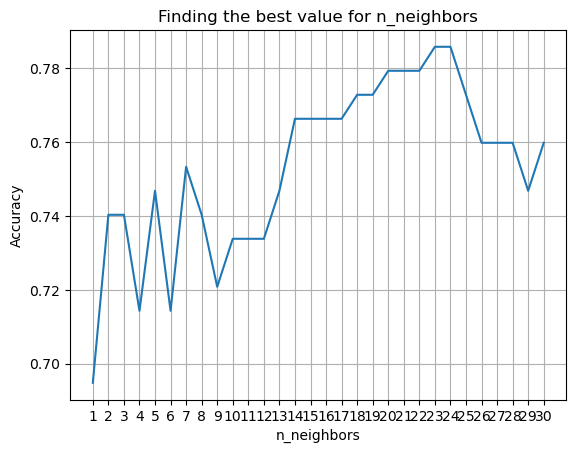

Highest accuracy value: 0.7857142857142857


In [87]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = [] 

for i in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc.append(metrics.accuracy_score(prediction, Y_test))

acc_series = pd.Series(acc)

plt.plot(X_axis, acc_series)
plt.xticks(range(1, 31))
plt.title("Finding the best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest accuracy value:', acc_series.max())


In [88]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [89]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)


SVC(kernel='linear', random_state=42)

In [90]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [91]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [92]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [93]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Data Model Evaluation

In [94]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [95]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 78.57142857142857
Support Vector Classifier: 73.37662337662337
Naive Bayes: 71.42857142857143
Decision tree: 68.18181818181817
Random Forest: 75.97402597402598


# Analysis

With the scores above, It is observed that K Nearest neighbor yields the highest score of accuracy 78.5%

In [96]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[87, 13],
       [20, 34]], dtype=int64)

<Axes: >

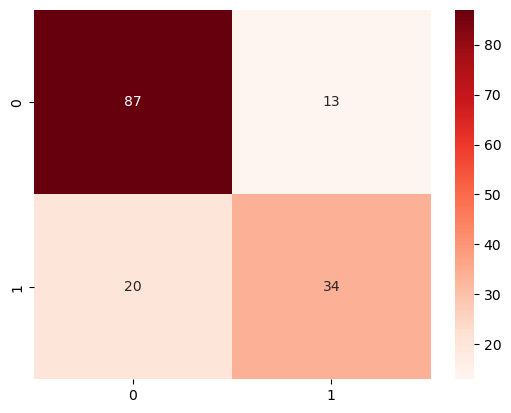

In [100]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Reds')

In [101]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

